In [1]:
import pickle
import numpy as np

In [2]:
with open('sources/train_qa.txt', 'rb') as f:
    train_data = pickle.load(f)

In [3]:
with open('sources/test_qa.txt', 'rb') as f:
    test_data = pickle.load(f)

In [4]:
type(train_data), type(test_data)

(list, list)

In [5]:
len(train_data), len(test_data)

(10000, 1000)

In [6]:
train_data

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [7]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [8]:
print('Story:')
print(' '.join(train_data[0][0]))
print('Question:')
print(' '.join(train_data[0][1]))
print('Answer:')
print(train_data[0][2])

Story:
Mary moved to the bathroom . Sandra journeyed to the bedroom .
Question:
Is Sandra in the hallway ?
Answer:
no


In [9]:
all_data = train_data + test_data
len(all_data)

11000

In [10]:
# adding each unique word in the text to a set
vocab_set = set()
for story, question, answer in all_data:
    vocab_set = vocab_set.union(set(story))
    vocab_set = vocab_set.union(set(question))
vocab_set.add('yes')
vocab_set.add('no')
len(vocab_set)

37

In [11]:
all_story_len = [len(data[0]) for data in all_data]
max_story_len = max(all_story_len)
all_question_len = [len(data[1]) for data in all_data]
max_question_len = max(all_question_len)
print(max_story_len, max_question_len)

156 6


In [12]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(filters=[]) # not to use default filters, an empty iterable is assigned 
tokenizer.fit_on_texts(vocab_set)
tokenizer.word_index

{'football': 1,
 'down': 2,
 'picked': 3,
 'went': 4,
 'bedroom': 5,
 'is': 6,
 'grabbed': 7,
 'up': 8,
 'office': 9,
 'discarded': 10,
 'no': 11,
 'left': 12,
 'to': 13,
 'bathroom': 14,
 'journeyed': 15,
 'moved': 16,
 'mary': 17,
 'kitchen': 18,
 'back': 19,
 '?': 20,
 'travelled': 21,
 'dropped': 22,
 '.': 23,
 'in': 24,
 'took': 25,
 'garden': 26,
 'milk': 27,
 'got': 28,
 'john': 29,
 'put': 30,
 'daniel': 31,
 'apple': 32,
 'hallway': 33,
 'yes': 34,
 'the': 35,
 'sandra': 36,
 'there': 37}

In [13]:
# seperating each story, question and answers
train_story = []
train_question = []
train_answer = []

for story, question, answer in train_data:
    train_story.append(story)
    train_question.append(question)
    train_answer.append(answer)

In [14]:
train_story_seq = tokenizer.texts_to_sequences(train_story)
len(train_story_seq)

10000

In [15]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len, max_question_len=max_question_len):
    
    X = [] # stories
    Xq = [] # questions
    Y = [] # answer
    
    for story, query, answer in data:
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in query]
        
        y = np.zeros(len(word_index)+1)
        y[word_index[answer]] = 1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    return(pad_sequences(X, maxlen=max_story_len), pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [16]:
stories_train, queries_train, answers_train = vectorize_stories(train_data)
stories_test, queries_test, answers_test = vectorize_stories(test_data)

In [17]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
sum(answers_test)
# at index 28 there are 497 1's for yes
# at index 34 there are 503 1's for no

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
       503.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0., 497.,   0.,   0.,   0.])

In [19]:
tokenizer.word_index['yes'], tokenizer.word_index['no']
# index for 'yes' and 'no' is 28 an 34 as seen in above cell

(34, 11)

In [20]:
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, LSTM

In [21]:
input_sequence = Input((max_story_len,)) # shape param. should be shape= max_story_len, batch size. since we don't know batch size yet, we left as none
question = Input((max_question_len,))
vocab_size = len(vocab_set) + 1

In [25]:
# input encoder m
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size, output_dim=64))
input_encoder_m.add(Dropout(0.3))
# output: (samples, story_maxlen, embedding dim)

In [26]:
# input encoder c
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size, output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))
# output: (samples, story_maxlen, max_question_len)

In [28]:
# question encoder
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_question_len))
question_encoder.add(Dropout(0.3))
# output: (samples, query_maxlen, embedding dim)

In [29]:
# encoder(input) ---> encoded 
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [30]:
match = dot([input_encoded_m, question_encoded], axes =(2,2))
match = Activation('softmax')(match)

In [31]:
response = add([match, input_encoded_c])
response = Permute((2,1))(response)

In [32]:
answer = concatenate([response, question_encoded])
answer

<tf.Tensor 'concatenate/concat:0' shape=(None, 6, 220) dtype=float32>

In [33]:
answer = LSTM(32)(answer)
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer) # output: (samples, vocab_size)
answer = Activation('softmax')(answer) # using softmax to convert 1 - 0

In [34]:
# building the final model
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 156)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, None, 64)     2432        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_4 (Sequential)       (None, 6, 64)        2432        input_2[0][0]                    
_______________________________________________________________________________________

In [43]:
history = model.fit([stories_train, queries_train], answers_train, batch_size=32, epochs=10, validation_data=([stories_test, queries_test], answers_test))

Epoch 1/10
313/313 [==============================] - 2s 7ms/step - loss: 0.6946 - val_loss: 0.6933
Epoch 2/10
313/313 [==============================] - 2s 7ms/step - loss: 0.6946 - val_loss: 0.6938
Epoch 3/10
313/313 [==============================] - 2s 7ms/step - loss: 0.6943 - val_loss: 0.6947
Epoch 4/10
313/313 [==============================] - 2s 7ms/step - loss: 0.6943 - val_loss: 0.6935
Epoch 5/10
313/313 [==============================] - 2s 7ms/step - loss: 0.6943 - val_loss: 0.6940
Epoch 6/10
313/313 [==============================] - 2s 7ms/step - loss: 0.6934 - val_loss: 0.6952
Epoch 7/10
313/313 [==============================] - 2s 7ms/step - loss: 0.6917 - val_loss: 0.6917
Epoch 8/10
313/313 [==============================] - 2s 7ms/step - loss: 0.6840 - val_loss: 0.6768
Epoch 9/10
313/313 [==============================] - 2s 7ms/step - loss: 0.6619 - val_loss: 0.6394
Epoch 10/10
313/313 [==============================] - 2s 7ms/step - loss: 0.6420 - val_loss: 0.6294

dict_keys(['loss', 'val_loss'])


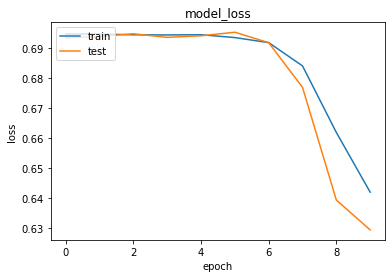

In [44]:
# model accuracy graph
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [45]:
# saving the model
model.save('my_new_model.h5')

In [ ]:
# loading a model
model.load_weights('chatbot_10.h5')
pred_results = model.predict(([stories_test, queries_test]))
test_data